In [ ]:
# clone pygwinc-ce into colab
!git clone https://gitlab.com/cosmic-explorer/pygwinc-ce.git

Cloning into 'pygwinc-ce'...
remote: Enumerating objects: 4555, done.
remote: Counting objects: 100% (645/645), done.
remote: Compressing objects: 100% (285/285), done.
remote: Total 4555 (delta 402), reused 578 (delta 348), pack-reused 3910
Receiving objects: 100% (4555/4555), 2.49 MiB | 15.35 MiB/s, done.
Resolving deltas: 100% (3083/3083), done.


In [ ]:
# clone inspiral range and lal package
!git clone https://git.ligo.org/gwinc/inspiral-range.git
!pip install inspiral_range[lal]

Cloning into 'inspiral-range'...
remote: Enumerating objects: 932, done.
remote: Counting objects: 100% (381/381), done.
remote: Compressing objects: 100% (176/176), done.
remote: Total 932 (delta 228), reused 307 (delta 182), pack-reused 551
Receiving objects: 100% (932/932), 472.72 KiB | 3.33 MiB/s, done.
Resolving deltas: 100% (572/572), done.
     |████████████████████████████████| 339 kB 794 kB/s 
     |████████████████████████████████| 27.6 MB 77 kB/s 
     |████████████████████████████████| 52 kB 622 kB/s 
     |████████████████████████████████| 1.6 MB 1.9 MB/s 
     |████████████████████████████████| 54 kB 1.3 MB/s 
     |████████████████████████████████| 3.2 MB 1.8 MB/s 
  Created wheel for ligo-segments: filename=ligo_segments-1.3.0-cp37-cp37m-linux_x86_64.whl size=86040 sha256=2e878864b81a6348739727b487996c3c1a8cd0de589bd314ce3297e423642ad0
  Stored in directory: /root/.cache/pip/wheels/b7/cc/08/d877a20dafb946a7cf821c6d1a2895f1e227a54cef891c14d8
  Created wheel for lscsoft-g

In [ ]:
# mount google drive to have access to noise budgets 
from google.colab import drive
drive.mount('/content/drive/', force_remount = True)

In [ ]:
# make sure you're in develepor branch of pygwinc-ce
!git --git-dir=/content/pygwinc-ce/.git checkout dev
!git --git-dir=/content/pygwinc-ce/.git branch

In [ ]:
# to get latex running two different sets of code used
# if one stops working use the other 
! sudo apt-get install dvipng
! sudo apt-get install ghostscript
! sudo apt-get install texlive-fonts-recommended
! sudo apt-get install texlive-generic-recommended
! sudo apt-get install texlive-latex-base
! sudo apt-get install texlive-latex-extra
! sudo apt-get install texlive-latex-recommended
! sudo apt-get install texlive-publishers
! sudo apt-get install texlive-science
! sudo apt-get install texlive-xetex
! sudo apt-get install cm-super

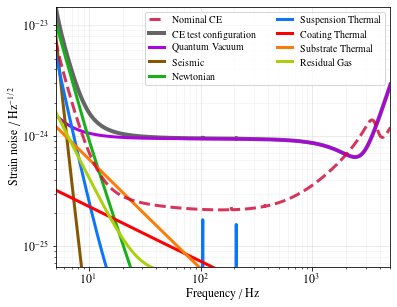

In [ ]:
# This script generates the noise budget for CE test configurations.
# It should only be run from the dev branch of the pygwinc-ce gwinc fork 
# https://gitlab.com/cosmic-explorer/pygwinc-ce
# and relies on the noise budgets located in the CE modeling repository
# https://gitlab.com/cosmic-explorer/cosmic-explorer-modeling/

# Josh Smith, Sandra Serrano, Kevin Kuns, 2021
import sys
sys.path.insert(0, '/content/pygwinc-ce')
import numpy as np
import gwinc
import matplotlib.pyplot as plt
import matplotlib as mpl
import argparse
import os

mpl.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
    'font.size': 12,
    'text.latex.preamble': r'\usepackage{amsmath,txfonts}'
})

# Set the directory where the ce modeling repo was cloned
#nbdir='/Users/jrsmith/git/cosmic-explorer-modeling/NoiseBudgets/'

# Set frequency and number of points for the plots
fmin = 5
fmax = 5e3
npts = 1000
ff = np.logspace(np.log10(fmin), np.log10(fmax), npts)

# Function to get the various noise traces
def get_traces(ifo):
    budget = gwinc.load_budget(ifo, freq=ff)
    traces = budget.run()
    return traces

traces_CE    = get_traces('CE2silica')
traces_iCE   = get_traces('CE1')
traces_Aplus = get_traces('Aplus')
traces_CE_hp = get_traces('/content/drive/MyDrive/Noise Budgets/NoiseBudgets/20km/pm/geom/CE2silicon.yaml')

# Function to generate the plot
def make_hp_budget_plot():
    """Make high power silicon noise budget
    """
    fig = traces_CE_hp.plot()
    ax = fig.gca()
    ax.loglog(
        ff, traces_CE.asd, ls='--', c='xkcd:cherry', lw=3, alpha=0.8,
        label='Nominal CE')

    handles, labels = ax.get_legend_handles_labels()
    labels = [labels[-1], 'CE test configuration'] + labels[1:-1]
    handles = [handles[-1]] + handles[:-1]
    ax.legend(
        handles, labels, ncol=2, fontsize='small', handlelength=1.5)

    ax.set_xlabel('Frequency / Hz')
    ax.set_ylabel(r'Strain noise $\big/$ Hz$^{-1/2}$')
    ax.grid(True, which='major', alpha=0.5)
    ax.grid(True, which='minor', alpha=0.2)

    fig.set_size_inches((6, 4.8))
    fig.savefig('CE_hp_nb.pdf', bbox_inches='tight')

# Run the function to generate the plot
make_hp_budget_plot()
#plt.title("GWINC Noise Budget: Cosmic Explorer 2 (Silicon)")
#plt.savefig('NoiseBudgets 40km cb CE2silicon hp.png', bbox_inches='tight')

In [ ]:
# Calculate range using inspiral range package and lal dependencies 
# !git clone https://git.ligo.org/gwinc/inspiral-range.git
# !pip install inspiral_range[lal]
import sys
sys.path.insert(0, '/content/inspiral-range')
import gwinc 
import inspiral_range
import numpy as np
range = inspiral_range.horizon_redshift(traces_CE_hp.freq, traces_CE_hp.psd, m1=1.4, m2=1.4)
print(range)

1.102742097409834
